#### Data Visualization w/ Matplotlib(intro)

<b>fig, ax = plt.subplots(3,2)</b> Creates figure and axes objects with 3 rows and 2 columns. Default is 1,1. Use sharey=True to make y axis values have same range if using multiples axes  <br></br>
<b>ax.plot(df["col1"], df["col2"])</b> Call axes method plot to add data. If using multiples axes you would use ax[0,0].plot() <br></br>
<b>plt.show()</b> Show the figure. <br></br>
<br></br>
<b>Parameters for ax.plot()</b> marker="o", linestyle="--", color="r".<br></br>
<b>ax.set_xlabel("Time (months)")</b> Same for ylabel and title


S:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
S:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


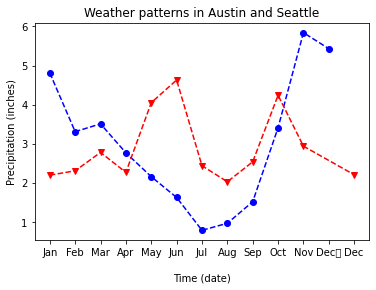

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

def read_txt(filename):

    with open(filename, 'r') as f:
        text_df = f.read()

        list_of_rows = text_df.replace(r'\n', '|')

    with open('file.txt', 'w') as f:
        f.write(list_of_rows)

read_txt('austin_weather.txt')
austin_weather = pd.read_csv('file.txt', delimiter=',', lineterminator='|')
read_txt('seattle_weather.txt')
seattle_weather = pd.read_csv('file.txt', delimiter=',', lineterminator='|')

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle and Austin data, setting data appearance
ax.plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color="b", marker="o", linestyle="--")
ax.plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color="r", marker="v", linestyle="--")

# Customize the x,y axis and title label
ax.set_xlabel('Time (date)')
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Weather patterns in Austin and Seattle")

plt.show()

S:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
S:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


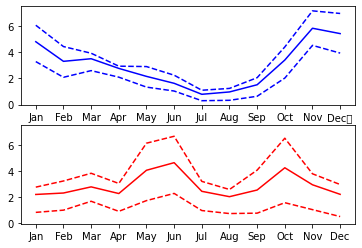

In [53]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-NORMAL"], color="b")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-25PCTL"], color="b", linestyle="--")
ax[0].plot(seattle_weather["MONTH"], seattle_weather["MLY-PRCP-75PCTL"], color="b", linestyle="--")

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-NORMAL"], color="r")
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-25PCTL"], color="r", linestyle="--")
ax[1].plot(austin_weather["MONTH"], austin_weather["MLY-PRCP-75PCTL"], color="r", linestyle="--")

plt.show()

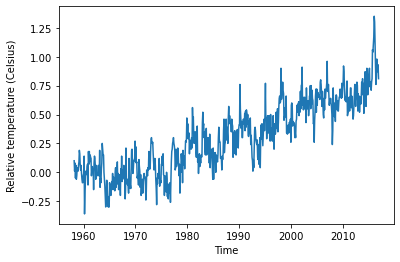

In [16]:
import matplotlib.pyplot as plt
climate_change = pd.read_csv("climate_change.csv", parse_dates=True, index_col="date")
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change["relative_temp"])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Relative temperature (Celsius)")

# Show the figure
plt.show()

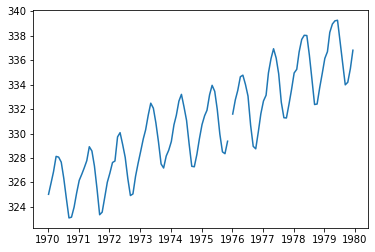

In [17]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

<b>var = ax.twinx()</b> The plots will share the same x-axis but will have different y-axis <br></br>
<b>ax.ticks_params(y, color="red")</b> For y axis change the color of the ticks to red <br></br>
<b>def plot_timeseries(axes, x, y, color, xlabel, ylabel):</b> Function to plot time series <br></br>
<b>ax.annotate("annotation here", xy=(x_value, y_value), xytext=(), arrowprops={})</b> xytext is where text will go and xy is what values we want to annotate. Arrowprops take in dictionary. Can use pd.Timestamp() for x or y value. Ex: pd.Timestamp("2015-10-7"). 


In [18]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

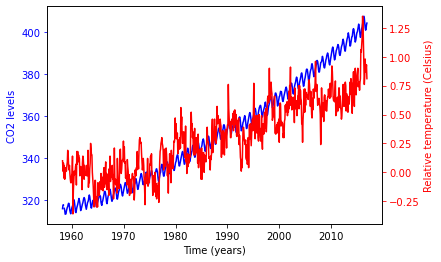

In [19]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()

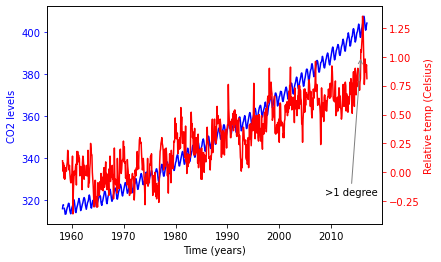

In [20]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change["relative_temp"], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={"arrowstyle":"->", "color":"gray"} )

plt.show()


#### Quantitative comparisons and statistical visualizations
<b>ax.set_xticklabels(x, rotation=90)</b> This rotates the labels by 90 degress <br></br>
<b>ax.bar("Title", df["col1"], bottom=df["col0"])</b> The col data should stack on top of the col0 data. <br></br>
<b>ax.bar("Title", df["col2], bottom=df["col0"] + df["col1"])</b> Stack data on top of each other. Can add label parameter to label column. <br></br>
<b>ax.legend</b> To show which color belongs to which column.
<b>ax.hist(bins=5, histtype="step")</b> Bins parameter can be passed a list, histtype="step" shows only the outline of the bars <br></br>
<b>yerr=df["col"].std()</b> Parameter for ax.bar() method. Draws vertical line(s) on the data displayed also called ERROR BARS <br></br>
<b>ax.boxplot([x, y])</b> Create box plot that shows serveral landmarkis in each distribution. For example, the median, percentiles, and outliers <br></br>
<b>ax.scatter(c=df.index)</b>



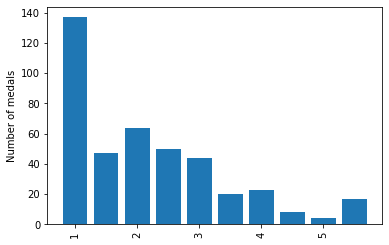

In [55]:
fig, ax = plt.subplots()
medals = pd.read_csv("medals_by_country_2016.csv")
# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()


In [56]:
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

# Display the legend
ax.legend()

plt.show()

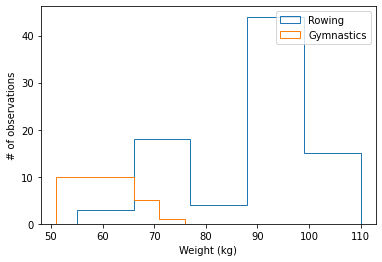

In [59]:
fig, ax = plt.subplots()
read_txt('mens_rowing.txt')
mens_rowing = pd.read_csv('file.txt', delimiter=',', lineterminator='|')
read_txt('mens_gymnastics.txt')
mens_gymnastics = pd.read_csv('file.txt', delimiter=',', lineterminator='|')

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing["Weight"], label="Rowing", histtype="step", bins=5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics["Weight"], label="Gymnastics", histtype="step", bins=5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

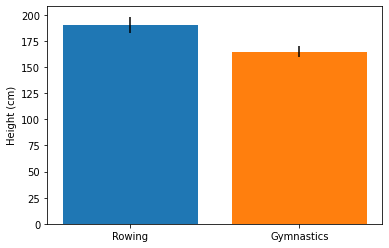

In [60]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr=mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr=mens_gymnastics["Height"].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

S:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
S:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


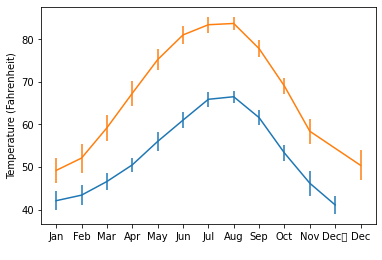

In [61]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr=seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr=austin_weather["MLY-TAVG-STDDEV"]) 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

S:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


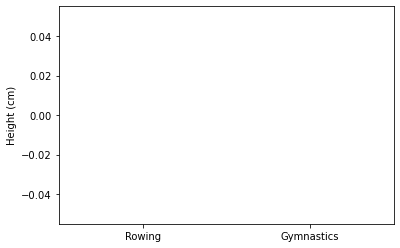

In [68]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

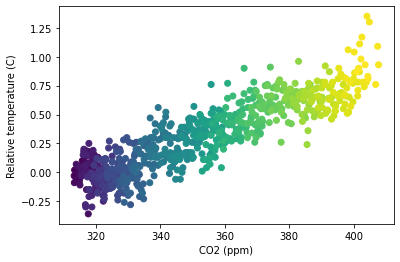

In [63]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change["co2"], climate_change["relative_temp"], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

#### Sharing Visualizations with other 
Dark background are discouraged. 

<b>plt.style.use("default")</b> Changes style of the plot. Ex are ggplot, bmh, seaborn-colorblind and more. <br></br>
<b>fig.savefig("name.png", quality=50, dpi=300)</b> quality parameter controls degree of loss of quality. dpi controls resolution. <br></br>
<b>fig.set_size_inches([5, 3])</b> Controls size of figure to be displayed/printed 


In [64]:
read_txt('summer_2016_medals.txt')
summer_2016_medals = pd.read_csv('file.txt', delimiter=',', lineterminator='|')
# Extract the "Sport" column
sports_column = summer_2016_medals["Sport"]

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' nan]


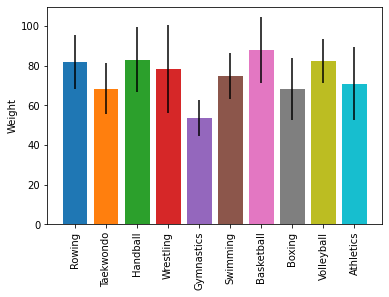

In [65]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals["Sport"] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df["Weight"].mean(), yerr=sport_df["Weight"].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig("sports_weights.png")